In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Para acessar os arquivos do Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Caminho da pasta onde os arquivos CSV estão salvos
base_dir = "/content/drive/MyDrive/UFC/TCC/odonto/history/metrics"

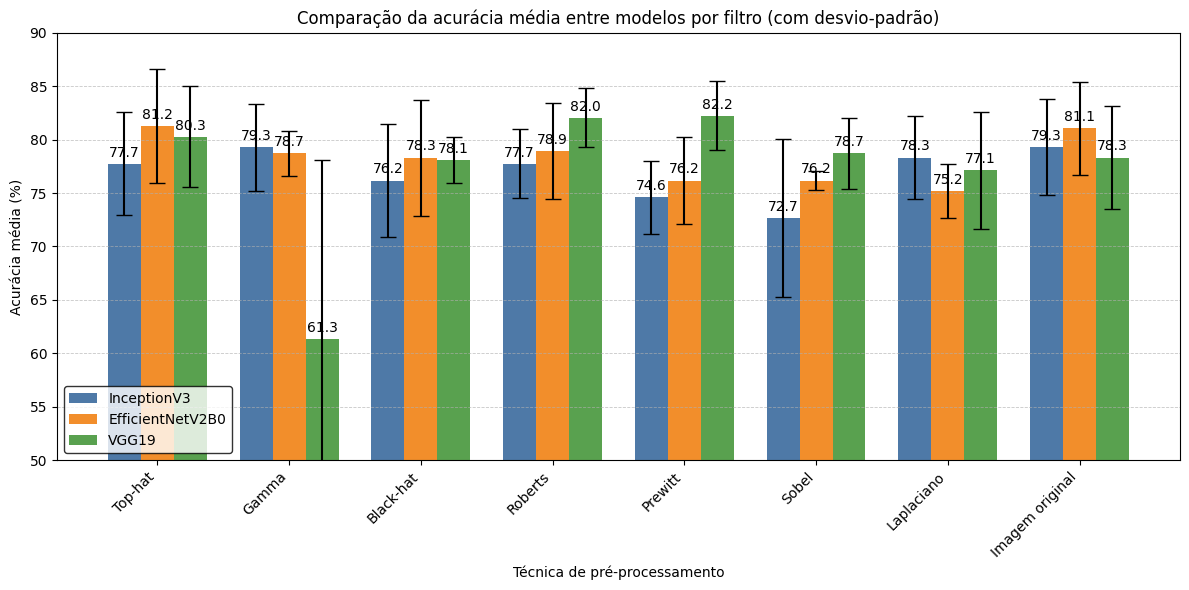

In [ ]:
# Modelos e filtros utilizados
modelos = ['InceptionV3', 'EfficientNetV2B0', 'VGG19']
filtros = ['add_tophat', 'gammaCorrection', 'subtract_blackhat', 'subtract_roberts', 'subtract_prewitt', 'subtract_sobel', 'subtract_laplacian', 'images']

# Inicializa dicionário para armazenar resultados
dados = {modelo: [] for modelo in modelos}

# Coleta as médias e desvios de acurácia por filtro e modelo
for filtro in filtros:
    for modelo in modelos:
        accs = []
        for fold in range(4):
            filename = f"{filtro}_{modelo}_fold{fold}.csv"
            filepath = os.path.join(base_dir, filename)
            if os.path.exists(filepath):
                df = pd.read_csv(filepath)
                if 'val_accuracy' in df.columns:
                    val_acc = df['val_accuracy'].iloc[-1] * 100
                    accs.append(val_acc)
        if accs:
            media = np.mean(accs)
            desvio = np.std(accs)
        else:
            media, desvio = np.nan, np.nan
        dados[modelo].append((media, desvio))

# Preparação para o gráfico de barras com erro padrão
x = np.arange(len(filtros))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#4E79A7', '#F28E2B', '#59A14F']
for idx, modelo in enumerate(modelos):
    medias = [dados[modelo][i][0] for i in range(len(filtros))]
    desvios = [dados[modelo][i][1] for i in range(len(filtros))]
    bars = ax.bar(x + (idx - 1) * width, medias, width, yerr=desvios,
                  label=modelo, capsize=6, color=colors[idx])
    for bar, media in zip(bars, medias):
        if not np.isnan(media):
            ax.annotate(f'{media:.1f}',
                        xy=(bar.get_x() + bar.get_width() / 2, media),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

# Estilo do gráfico
ax.set_ylabel('Acurácia média (%)')
ax.set_xlabel('Técnica de pré-processamento')
ax.set_title('Comparação da acurácia média entre modelos por filtro (com desvio-padrão)')
ax.set_xticks(x)
ax.set_xticklabels(['Top-hat', 'Gamma', 'Black-hat', 'Roberts',
                    'Prewitt', 'Sobel', 'Laplaciano', 'Imagem original'], rotation=45, ha='right')
ax.set_ylim(50, 90)
ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
ax.legend(frameon=True, edgecolor='black')

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/UFC/TCC/odonto/figuras/comparacao_acuracia_modelos.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

<Figure size 640x480 with 0 Axes>